## Observations and Insights 

The drug regimens Capomulin and Ramicane have the lowest average Tumour Volumes at 40.68 mm3 and 40.22 mm3 respectively when compared to all other drug regimens.
As per the line plot, the Tumour Volume for mouse u364 under the Capomulin treatment regimen increased for about the first 15 days and then there was a significant decrease in tumour volume till about the 25th day of treatment. Then there was a plateau till about day number 40. And then a significant drop in tumour volume till day 45.
The correlation between mouse weight and the average tumour volume is 0.84 which is a fairly strong positive relationship. 
This shows that there is an increase in the average tumour volume as the weight of the mouse increases.

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
len(combined_data['Mouse ID'].unique())

249

In [83]:
df = combined_data[['Mouse ID', 'Timepoint']]
duplicate = df[df.duplicated()]
duplicate

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [84]:
combined_data.loc[combined_data['Mouse ID']=='g989',:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [85]:
cleaned_data = combined_data.loc[combined_data['Mouse ID']!='g989',:]

In [86]:
len(cleaned_data['Mouse ID'].unique())

248

## Summary Statistics

In [87]:
regimen_group = cleaned_data.groupby(['Drug Regimen'])

mean = regimen_group['Tumour Volume (mm3)'].mean()
median = regimen_group['Tumour Volume (mm3)'].median()
variance = regimen_group['Tumour Volume (mm3)'].var()
standard_deviation = regimen_group['Tumour Volume (mm3)'].std()
SEM = regimen_group['Tumour Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean of Tumour Volume (mm3)':mean,
                          'Median of Tumour Volume (mm3)':median,
                          'Variance of Tumour Volume (mm3)':variance,
                          'Standard Deviation of Tumour Volume (mm3)':standard_deviation,
                          'SEM of Tumour Volume (mm3)':SEM})
summary_df

,Mean of Tumour Volume (mm3),Median of Tumour Volume (mm3),Variance of Tumour Volume (mm3),Standard Deviation of Tumour Volume (mm3),SEM of Tumour Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [88]:
summary_df = cleaned_data.groupby('Drug Regimen').agg({'Tumour Volume (mm3)': ['mean','median','var','std','sem']})
summary_df

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

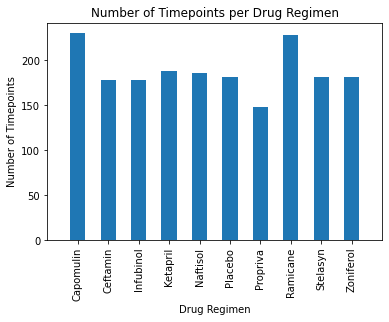

In [89]:
count_timepoints = regimen_group['Timepoint'].count()
count_timepoints.plot(kind='bar')
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlim(-1,len(count_timepoints.index))
plt.show()

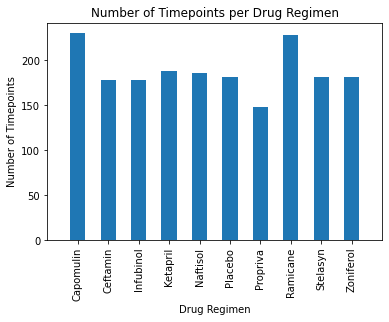

In [90]:
plt.bar(count_timepoints.index, count_timepoints, width=0.5)
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlim(-1,len(count_timepoints.index))
plt.xticks(rotation=90)
plt.show()

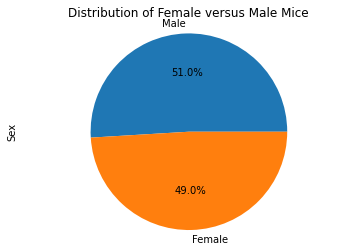

In [91]:
sex_df = cleaned_data['Sex'].value_counts()
sex_df.plot(kind='pie', title = 'Distribution of Female versus Male Mice', autopct='%1.1f%%')
plt.axis("equal")
plt.show()

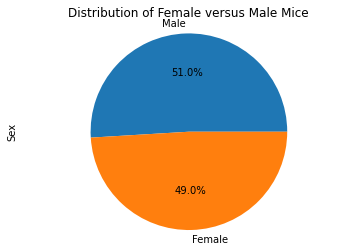

In [92]:
sex = sex_df.index
count = sex_df.values
plt.pie(count, labels=sex, autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [93]:
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_groups)]

last_timepoints = data.groupby(['Drug Regimen', 'Mouse ID']).max()['Timepoint']
last_timepoints = last_timepoints.reset_index()

tumour_volumes = pd.merge(last_timepoints, data, on=['Drug Regimen', 'Mouse ID', 'Timepoint'])

quartiles = tumour_volumes.groupby('Drug Regimen')['Tumour Volume (mm3)'].quantile([0.25, 0.5, 0.75]).unstack(level=1)
iqr = quartiles[0.75] - quartiles[0.25]

In [94]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

outlier_list = []

max_timepoint_df = cleaned_data.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df.reset_index()

merged_df = pd.merge(max_timepoint_df,cleaned_data, on=['Mouse ID','Timepoint'],how='left')

for treatment in treatments:
    treatment_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    tumour_values = treatment_df['Tumour Volume (mm3)']
    
    quartiles = tumour_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = treatment_df[(treatment_df['Tumour Volume (mm3)'] < lower_bound) | (treatment_df['Tumour Volume (mm3)'] > upper_bound)]
    
    outlier_list.append(outliers['Tumour Volume (mm3)'])

print(f"Capomulin's potential Tumour Volume (mm3) outliers: {outlier_list[0]}")
print(f"Ramicane's potential Tumour Volume (mm3) outliers: {outlier_list[1]}")
print(f"Infubinol's potential Tumour Volume (mm3) outliers: {outlier_list[2]}")
print(f"Ceftamin's potential Tumour Volume (mm3) outliers: {outlier_list[3]}")

Capomulin's potential Tumour Volume (mm3) outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Ramicane's potential Tumour Volume (mm3) outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Infubinol's potential Tumour Volume (mm3) outliers: 31    36.321346
Name: Tumour Volume (mm3), dtype: float64
Ceftamin's potential Tumour Volume (mm3) outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)


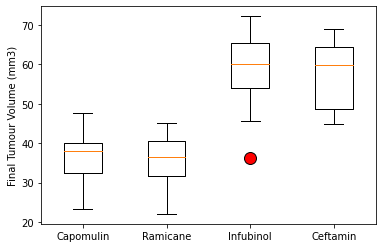

In [95]:
tumour_volume_data = tumour_volumes.groupby('Drug Regimen')['Tumour Volume (mm3)']

tumour_volume_data = [group.tolist() for _, group in tumour_volume_data]

treatments = tumour_volumes['Drug Regimen'].unique()

tumour_volume_data = [tumour_volume_data[i] for i in [0, 3, 2, 1]]
treatments = [treatments[i] for i in [0, 3, 2, 1]]

fig, ax = plt.subplots(figsize=(6,4))

bp = ax.boxplot(tumour_volume_data, labels=treatments, flierprops={'markerfacecolor': 'r', 'markersize': 12})

ax.set_ylabel('Final Tumour Volume (mm3)')

plt.show()

## Line and Scatter Plots

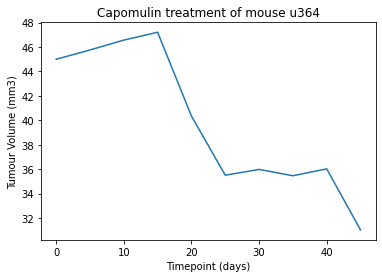

In [96]:
mouse_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

mouse_id = 'u364'
selected_mouse_data = mouse_data[mouse_data['Mouse ID'] == mouse_id]

selected_mouse_data.plot(x='Timepoint', y='Tumour Volume (mm3)', title='Capomulin treatment of mouse ' + mouse_id, legend=False)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumour Volume (mm3)')

plt.show()

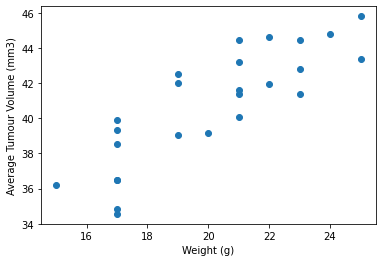

In [97]:
capomulin_df = mouse_data[mouse_data["Drug Regimen"] == "Capomulin"]

capomulin_df_grouped = capomulin_df.groupby("Mouse ID")

avg_tumour_capomulin = capomulin_df_grouped["Tumour Volume (mm3)"].mean()

mouse_weights = capomulin_df_grouped["Weight (g)"].mean()

plt.scatter(mouse_weights, avg_tumour_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumour volume is 0.84


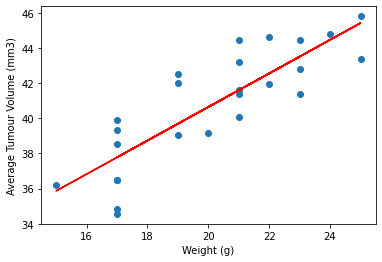

In [98]:
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumour_capomulin)

regress_values = mouse_weights * slope + intercept

print(f"The correlation between mouse weight and the average tumour volume is {'{:,.2f}'.format(r_value)}")

plt.scatter(mouse_weights, avg_tumour_capomulin)
plt.plot(mouse_weights, regress_values, "r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.show()